In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

## Read csv

In [2]:
df = pd.read_csv("data.csv")
df = df[['age21', 'age22']+['<0.5hrs', '0.5-1hrs', '1-2Hrs', '2-3hrs', '>3hrs']+['avg-pop', 'avg-rock', 'avg-hiphop', 'avg-edm']]
df

,age21,age22,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs,avg-pop,avg-rock,avg-hiphop,avg-edm
0,1,0,0,0,0,0,1,70,87,77,83
1,0,1,0,0,1,0,0,87,80,77,83
2,1,0,0,0,0,0,1,100,87,100,90
3,0,0,1,0,0,0,0,93,100,83,80
4,0,1,0,0,1,0,0,100,100,100,73
5,0,1,1,0,0,0,0,100,100,93,40
6,1,0,0,1,0,0,0,90,80,90,87
7,1,0,0,1,0,0,0,100,90,100,80
8,1,0,0,0,0,1,0,97,67,83,63
9,1,0,0,0,0,0,1,97,60,97,93


## Hour

In [3]:
hour = df[['<0.5hrs', '0.5-1hrs', '1-2Hrs', '2-3hrs', '>3hrs']]
hour

,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,0,1,0
9,0,0,0,0,1


([<matplotlib.patches.Wedge at 0x7f7da61a0a10>,
 [Text(0.9801071672559598, 0.4993895680663527, '<0.5hrs'),
  Text(0.33991864973549485, 1.0461621822461364, '0.5-1hrs'),
  Text(-0.9801071906340715, 0.49938952218422455, '1-2Hrs'),
  Text(-0.7778174502021367, -0.7778174684082678, '2-3hrs'),
  Text(0.4993895451252883, -0.9801071789450161, '>3hrs')],
 [Text(0.5346039094123416, 0.2723943098543742, '15.0%'),
  Text(0.1854101725829972, 0.5706339175888016, '10.0%'),
  Text(-0.534603922164039, 0.2723942848277588, '35.0%'),
  Text(-0.42426406374661996, -0.42426407367723695, '5.0%'),
  Text(0.27239429734106635, -0.5346039157881906, '35.0%')])

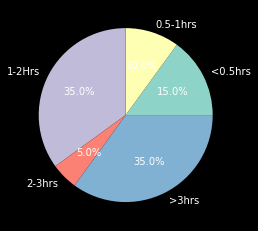

In [4]:
labels = list(hour.keys())
sizes = list(hour.sum())

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

## Avg

In [5]:
avg = df[['avg-pop', 'avg-rock', 'avg-hiphop', 'avg-edm']]
avg

,avg-pop,avg-rock,avg-hiphop,avg-edm
0,70,87,77,83
1,87,80,77,83
2,100,87,100,90
3,93,100,83,80
4,100,100,100,73
5,100,100,93,40
6,90,80,90,87
7,100,90,100,80
8,97,67,83,63
9,97,60,97,93


In [6]:
km = KMeans(2)
km.fit(avg)
y_hat = km.predict(avg)

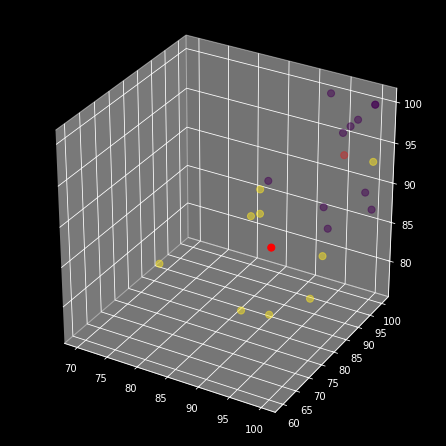

In [7]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg['avg-pop'], avg['avg-rock'], avg['avg-hiphop'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], c='red', s=50)

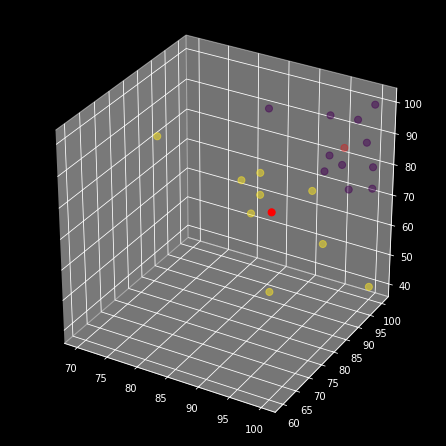

In [8]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg['avg-pop'], avg['avg-rock'], avg['avg-edm'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 3], c='red', s=50)

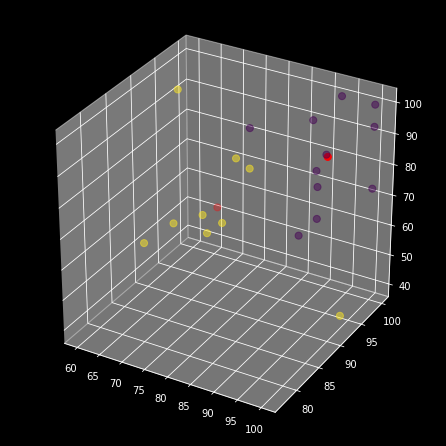

In [9]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg['avg-rock'], avg['avg-hiphop'], avg['avg-edm'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], c='red', s=50)

In [10]:
result = df[['age21', 'age22']+['<0.5hrs', '0.5-1hrs', '1-2Hrs', '2-3hrs', '>3hrs']]
result['y_hat'] = y_hat
result.sort_values('y_hat')

/home/j/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age21,age22,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs,y_hat
19,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0
16,0,1,0,0,1,0,0,0
15,1,0,0,0,0,0,1,0
7,1,0,0,1,0,0,0,0
14,0,1,0,0,1,0,0,0
18,1,0,0,0,0,0,1,0
10,0,1,0,0,1,0,0,0
